<a href="https://colab.research.google.com/github/KC-ai/APPM4600/blob/main/Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We can explore things like lagrange and newtons divided differences to avoid direct matrix inversion since the vandermonde matrix is usually numerically unstable and ill conditioned. To code it up, I want to use the class code and modify it for the newton and for lagrange.

Our system is going to be something like a_0 + a_1x + a_2x^2 + ...
We get the system of 1, x_0, x_0^2,... at each entry and copy paste that n times. Then vector of a_0 to a_1. That's equal to f(x_0) to f(x_n).

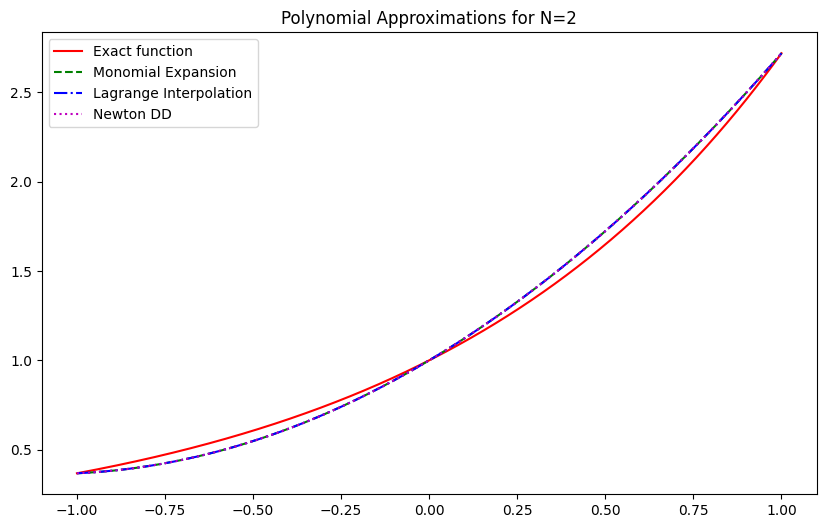

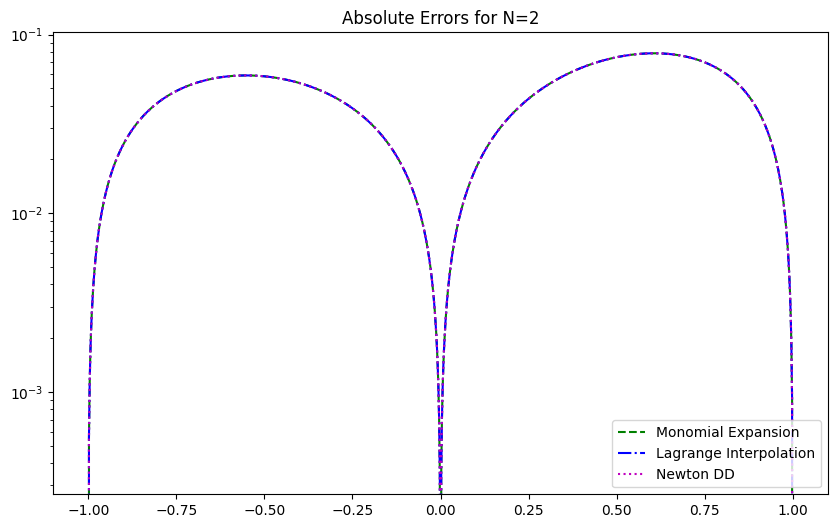

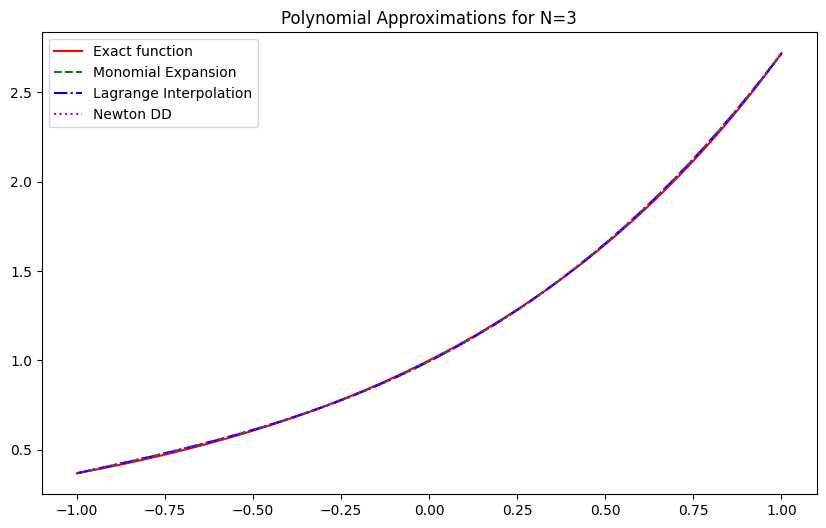

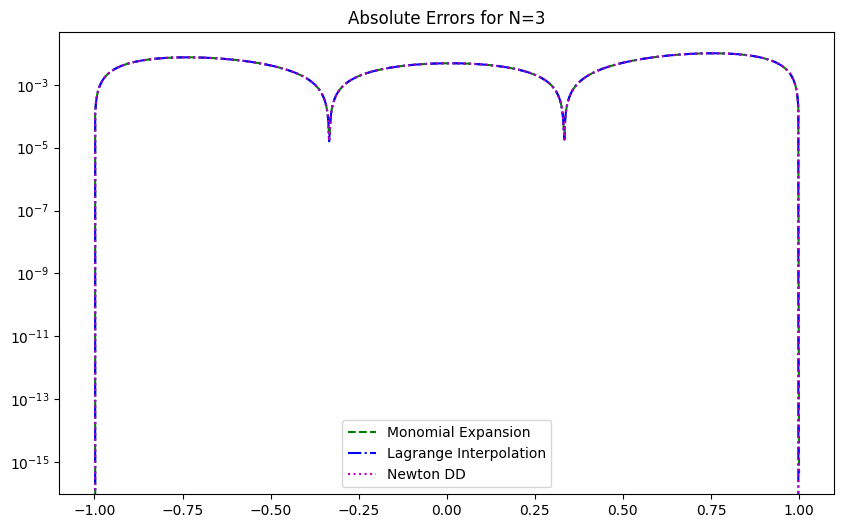

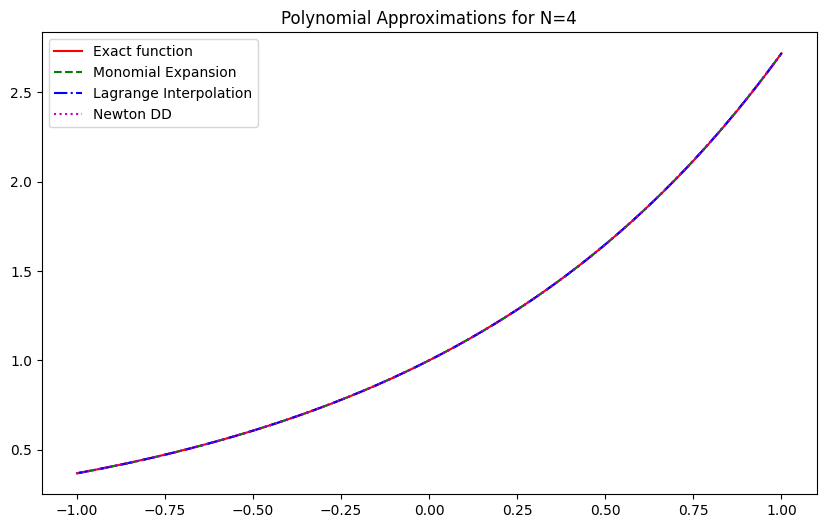

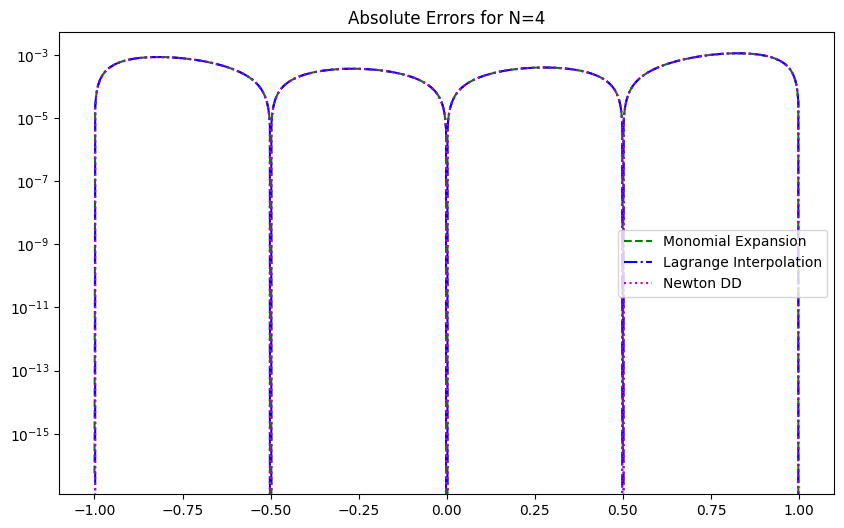

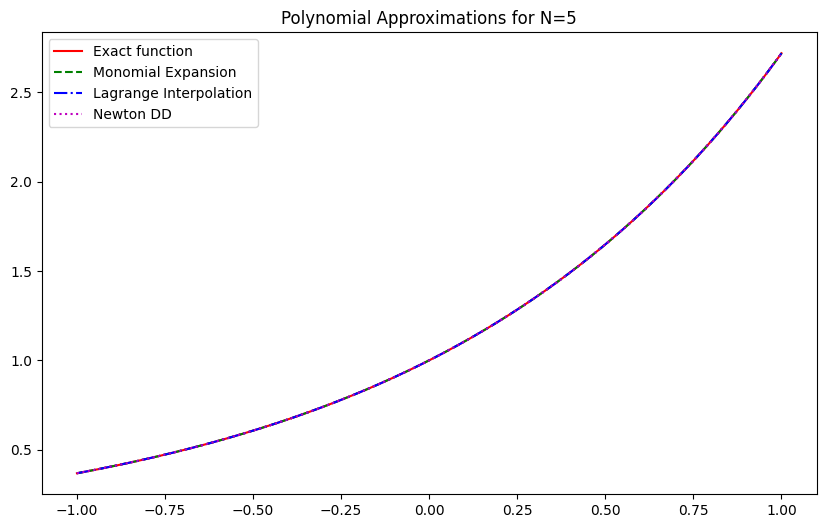

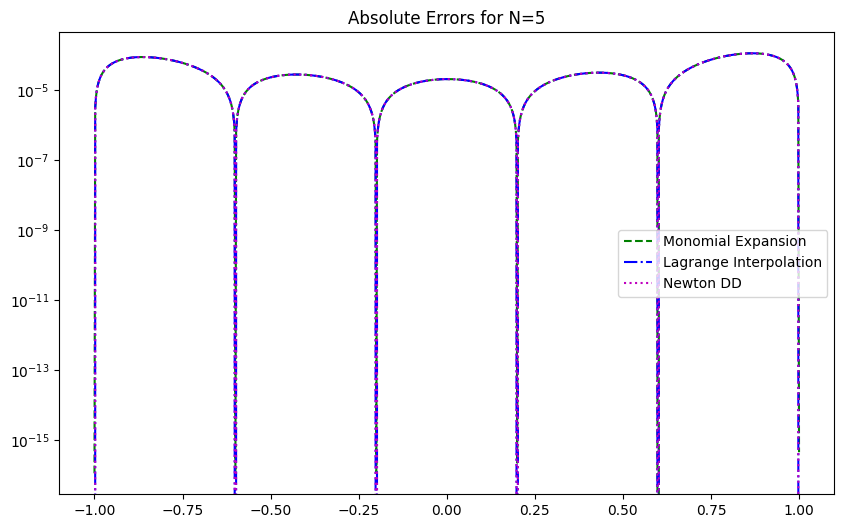

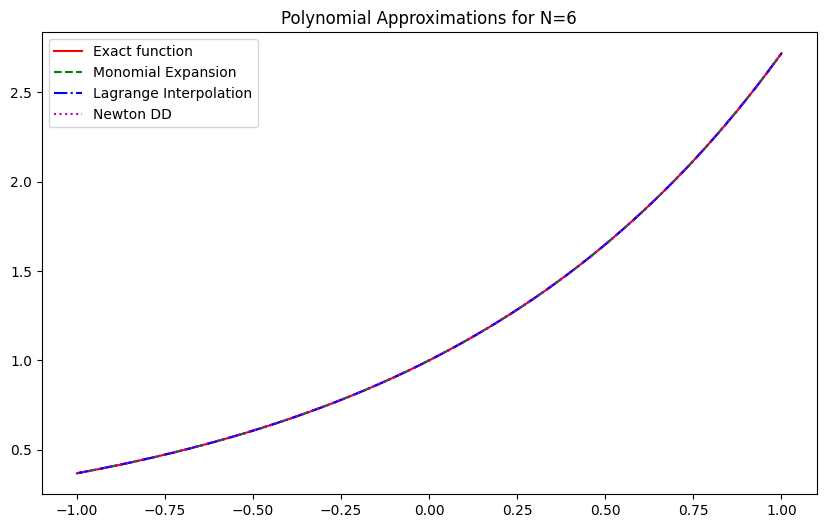

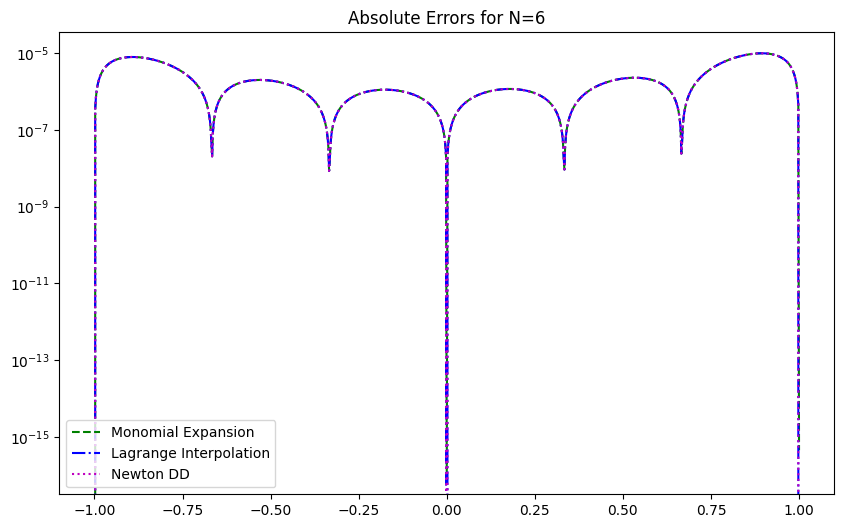

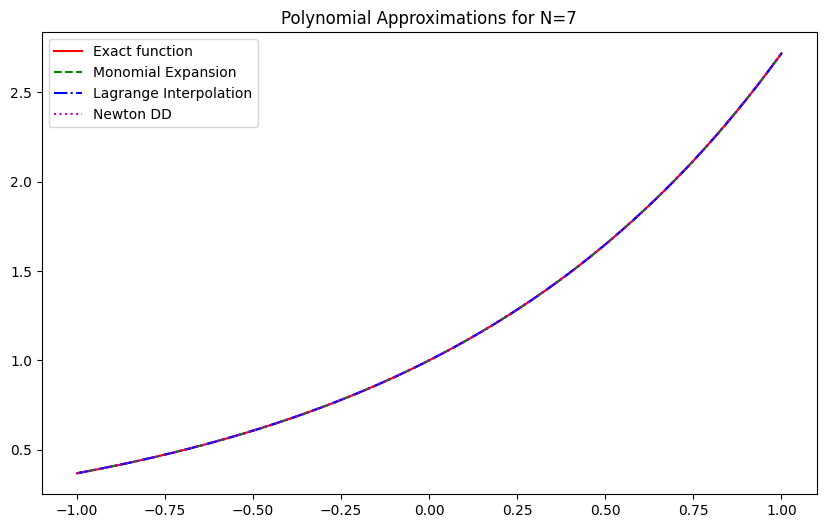

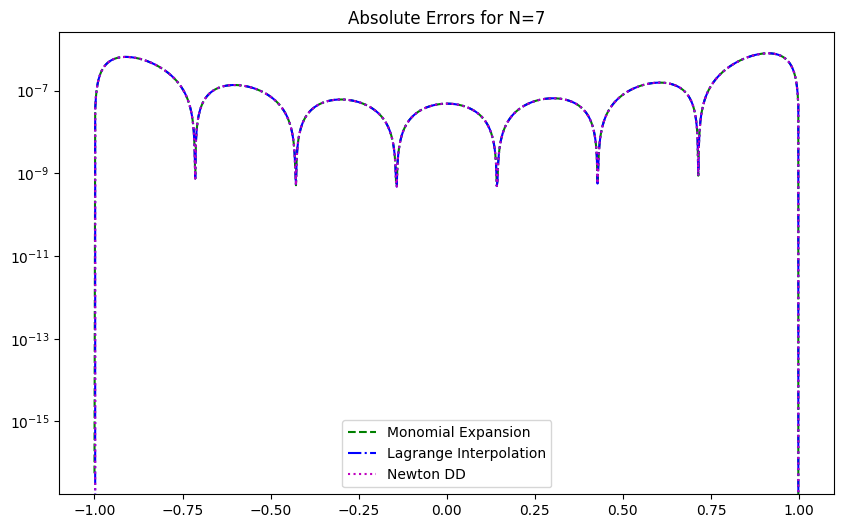

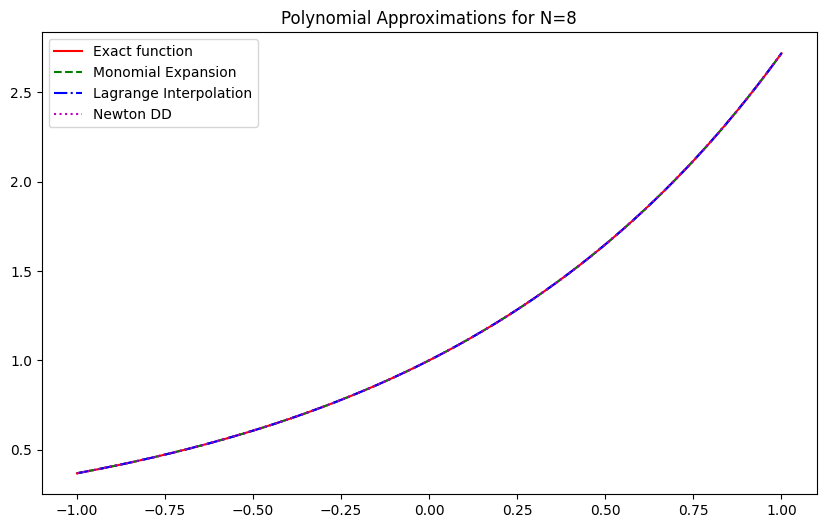

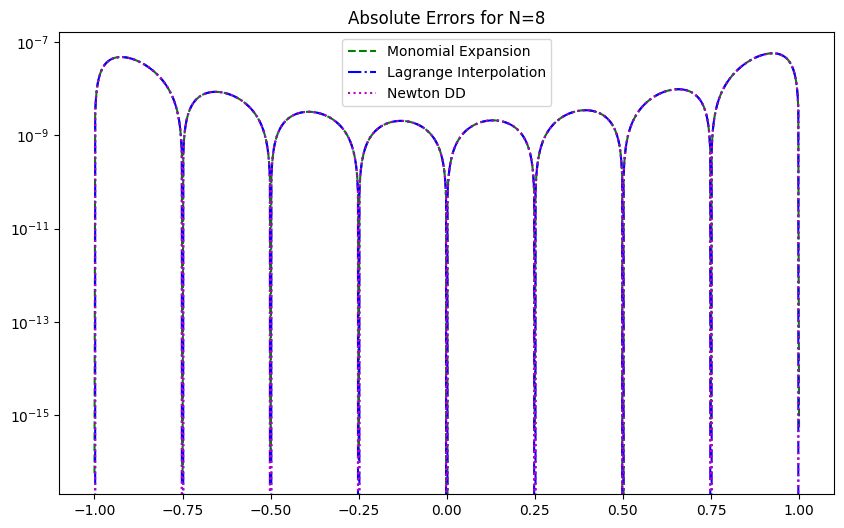

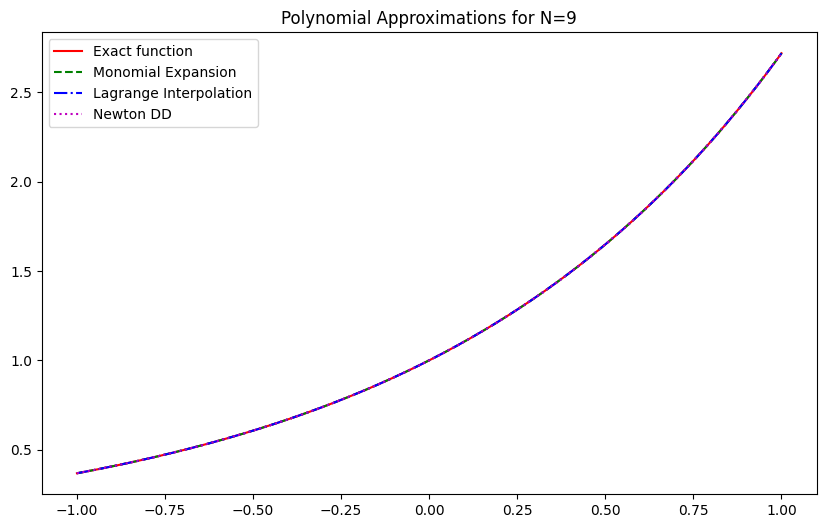

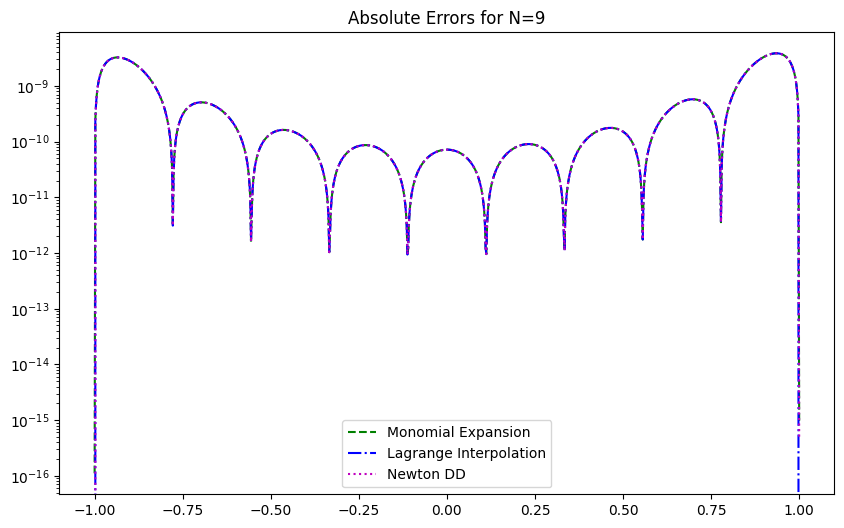

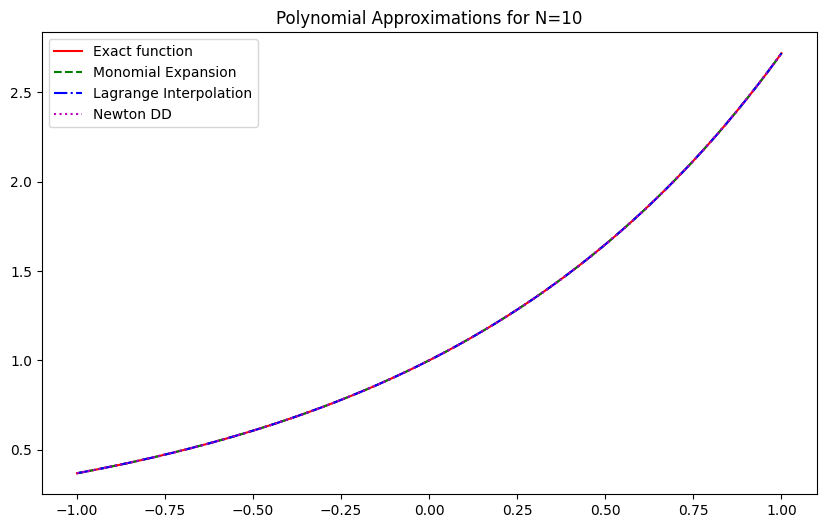

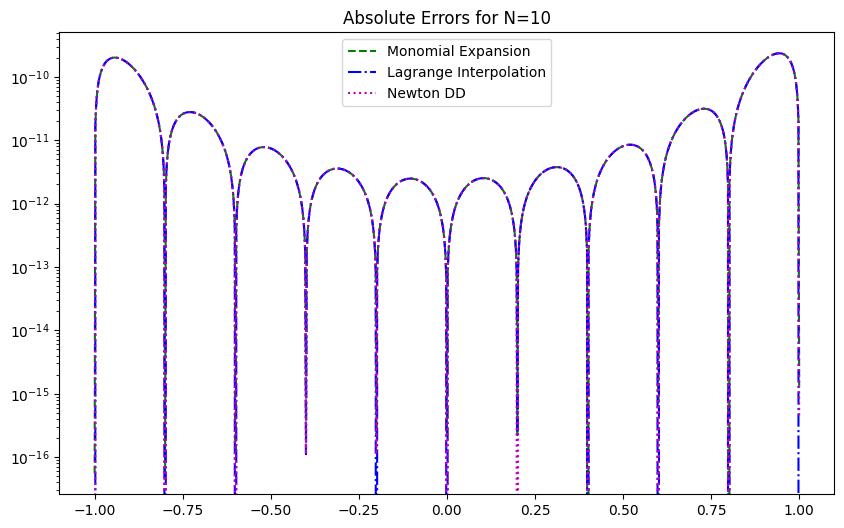

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: np.exp(x)

N_values = range(2, 11)

a, b = -1, 1

Neval = 1000
xeval = np.linspace(a, b, Neval + 1)
fex = f(xeval)

def monomial_coeffs(xint, yint):
    V = np.vander(xint, increasing=True)
    return np.linalg.solve(V, yint)

def eval_monomial(xeval, coeffs):
    return sum(c * xeval**i for i, c in enumerate(coeffs))

def eval_lagrange(xeval, xint, yint, N):
    yeval = np.zeros_like(xeval)
    for i in range(N+1):
        li = np.ones_like(xeval)
        for j in range(N+1):
            if i != j:
                li *= (xeval - xint[j]) / (xint[i] - xint[j])
        yeval += yint[i] * li
    return yeval

def divided_diff_table(xint, yint):
    n = len(xint)
    table = np.zeros((n, n))
    table[:, 0] = yint
    for j in range(1, n):
        for i in range(n - j):
            table[i, j] = (table[i+1, j-1] - table[i, j-1]) / (xint[i+j] - xint[i])
    return table[0]

def eval_newton(xeval, xint, coeffs):
    n = len(coeffs)
    yeval = np.zeros_like(xeval)
    for i in range(n):
        term = coeffs[i]
        for j in range(i):
            term *= (xeval - xint[j])
        yeval += term
    return yeval

for N in N_values:
    xint = np.linspace(a, b, N + 1)
    yint = f(xint)

    coeffs_monomial = monomial_coeffs(xint, yint)
    yeval_monomial = eval_monomial(xeval, coeffs_monomial)

    yeval_lagrange = eval_lagrange(xeval, xint, yint, N)

    coeffs_newton = divided_diff_table(xint, yint)
    yeval_newton = eval_newton(xeval, xint, coeffs_newton)

    plt.figure(figsize=(10, 6))
    plt.plot(xeval, fex, 'r-', label='Exact function')
    plt.plot(xeval, yeval_monomial, 'g--', label='Monomial Expansion')
    plt.plot(xeval, yeval_lagrange, 'b-.', label='Lagrange Interpolation')
    plt.plot(xeval, yeval_newton, 'm:', label='Newton DD')
    plt.legend()
    plt.title(f'Polynomial Approximations for N={N}')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.semilogy(xeval, np.abs(yeval_monomial - fex), 'g--', label='Monomial Expansion')
    plt.semilogy(xeval, np.abs(yeval_lagrange - fex), 'b-.', label='Lagrange Interpolation')
    plt.semilogy(xeval, np.abs(yeval_newton - fex), 'm:', label='Newton DD')
    plt.legend()
    plt.title(f'Absolute Errors for N={N}')
    plt.show()


Didn't finish b but we will first compute the nodes for all j 1 to N then evaluate our function for those nodes and then determine polynomial co efficients with Vandermonde interpolation, then compute 1000 values between -1 and 1, and then plot all of that. Maybe there will be a more ven distribution and less jumps, and it will be more accurate.